**05b_model_output_analysis_test**

This is where the real evaluation happens. Tests how model performs on Test dataset that it hasn't seen before. ROC curve, confusion matrix and saves out the precision/recall/F1 scores.

used this container: 
ml:1.0

In [4]:
# load packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import datetime

import shap

import tarfile
import pickle as pkl

import xgboost as xgb

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

import os
from urllib.parse import urlparse

from helper_functions import *

In [5]:
# define paths
base_dir = '/home/jovyan/work/Goldfinch/ML_paper/'
output_suffix = 'output_files/training_output/'
suffix = 'raw_data/intermediate_files/'

0_years_0
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80        53
         1.0       0.58      0.60      0.59        25

    accuracy                           0.73        78
   macro avg       0.69      0.70      0.69        78
weighted avg       0.73      0.73      0.73        78



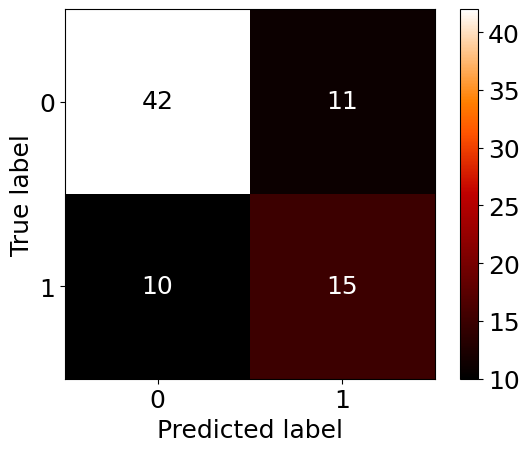

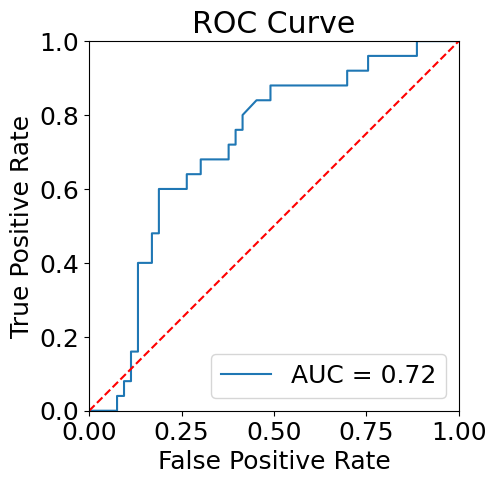

In [6]:
# read the model files
df_model = pd.read_csv(f'{base_dir}raw_data/reprocessed_model_log.csv')

executionid = 1
  
file_name_base = str(df_model[df_model['ExecutionID'] == executionid][['aggregation_time','gap']].values[0][0]) + '_years_' + str(df_model[df_model['ExecutionID'] == executionid][['aggregation_time','gap']].values[0][1])    

y_pred_bin, y_pred, Y_test, model, X_test, stand, file_name_base  = preprocess_test_ds(executionid, base_dir, suffix)

filepath = f'{base_dir}{output_suffix}'
input_file_name_variable = file_name_base + '_test'

conf_class_report(y_pred_bin, Y_test, filepath, input_file_name_variable, save_fig = True)

plot_roc_curve(y_pred[:,1], Y_test, filepath, input_file_name_variable, save_fig = True)

In [7]:
pd.show_versions()

Setuptools is replacing distutils.



INSTALLED VERSIONS
------------------
commit           : 87cfe4e38bafe7300a6003a1d18bd80f3f77c763
python           : 3.10.6.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.76-linuxkit
Version          : #1 SMP PREEMPT Mon Nov 8 11:22:26 UTC 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.5.0
numpy            : 1.23.3
pytz             : 2022.2.1
dateutil         : 2.8.2
setuptools       : 65.4.0
pip              : 22.2.2
Cython           : 0.29.32
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.1
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.5.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : 1.3.5
b

In [8]:
! pip list

Package                           Version
--------------------------------- -----------
alembic                           1.8.1
altair                            4.2.0
anyio                             3.6.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
asttokens                         2.0.8
async-generator                   1.10
attrs                             22.1.0
Babel                             2.10.3
backcall                          0.2.0
backports.functools-lru-cache     1.6.4
beautifulsoup4                    4.11.1
bleach                            5.0.1
blinker                           1.4
bokeh                             2.4.3
Bottleneck                        1.3.5
brotlipy                          0.7.0
cached-property                   1.5.2
catboost                          1.1.1
certifi                           2022.9.24
certipy                           0.1.3
cffi                              1.15.1
charset-normalizer       